In [1]:
import pandas as pd
import numpy as np
import os
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'datalab.sqlite')
db_path

'/Users/paulcolas/code/RonanB400/decp_ml/data/datalab.sqlite'

In [3]:
conn = sqlite3.connect(db_path)
db = conn.cursor()
query = f"""
SELECT *
FROM "data.gouv.fr.2022.clean"
"""

data = pd.read_sql_query(query, conn)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299670 entries, 0 to 299669
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   uid                        299670 non-null  object 
 1   id                         299670 non-null  object 
 2   nature                     299670 non-null  object 
 3   acheteur_id                299670 non-null  object 
 4   acheteur_nom               299477 non-null  object 
 5   acheteur_siren             299500 non-null  object 
 6   titulaire_id               299670 non-null  object 
 7   titulaire_typeIdentifiant  299670 non-null  object 
 8   titulaire_nom              292097 non-null  object 
 9   titulaire_siren            298537 non-null  object 
 10  objet                      299670 non-null  object 
 11  montant                    299670 non-null  float64
 12  codeCPV                    299670 non-null  object 
 13  procedure                  29

In [4]:
# montants_df = data['montant'].dropna()
# montants_df.describe()

In [5]:
# fig, ax = plt.subplots(figsize=(5, 2.5))
# sns.histplot( montants_df,log_scale=True, ax=ax)
# ax.set_xscale('log')
# ax.set_xlim(10**3,10**9)
# ax.set_xlabel('Montant (€)')
# ax.set_ylabel('Nombre de commandes')
# ax.set_title('Distribution des montants des commandes')

In [43]:
df = pd.DataFrame(data)
df.head()

,uid,id,nature,acheteur_id,acheteur_nom,acheteur_siren,titulaire_id,titulaire_typeIdentifiant,titulaire_nom,titulaire_siren,...,ccag,sousTraitanceDeclaree,typeGroupementOperateurs,tauxAvance,origineUE,origineFrance,lieuExecution_code,lieuExecution_typeCode,idAccordCadre,source_open_data
0,2154005160001320242024-LOT04,20242024-LOT04,Marché,21540051600013,COMMUNE DE BATILLY,215400516,78885470100018,SIRET,ACOMETAL,788854701,...,Pas de CCAG,NaN,Pas de groupement,NaN,NaN,NaN,54980,Code postal,None,data.gouv.fr decp-2024.json
1,243500667002882021M226MO,2021M226MO,Marché,24350066700288,CC VAL D'ILLE-AUBIGNE,243500667,38373211200032,SIRET,UNIVERS,383732112,...,Prestations intellectuelles,1,Solidaire,NaN,NaN,NaN,35520,Code postal,None,data.gouv.fr decp-2024.json
2,249710047000472024SS_PRD_TRV,2024SS_PRD_TRV,Marché,24971004700047,COMMUNAUTE DE COMMUNES DE MARIE GALANTE,249710047,43387249600016,SIRET,COTRAM B.T.P.,433872496,...,Travaux,NaN,Solidaire,NaN,NaN,NaN,97112,Code postal,None,data.gouv.fr decp-2024.json
3,6254801990001124-0806-L2,24-0806-L2,Marché,62548019900011,"LA MAISON POUR TOUS, SOCIETE ANONYME COOPERATI...",625480199,55204695502544,SIRET,ENGIE ENERGIE SERVICES,552046955,...,Pas de CCAG,0,Pas de groupement,NaN,NaN,NaN,39,Code département,None,data.gouv.fr decp-2024.json
4,20002563300013202424011BCR,202424011BCR,Marché,20002563300013,SI DE RESTAURATION COLLECTIVE,200025633,47698032100238,SIRET,POMONA EPISAVEURS,476980321,...,Fournitures courantes et services,0,Pas de groupement,0,0,0,45800,Code postal,None,data.gouv.fr decp-2025-04.json


In [7]:
data['formePrix'].value_counts()

formePrix
Forfaitaire    109095
Unitaire       107397
Mixte           83178
Name: count, dtype: int64

In [61]:
df.drop(df[df['montant'] > 999999999].index, inplace=True)

In [63]:
df.drop(df[df['montant'] ==0].index, inplace=True)

In [64]:
df[df['montant']==0]

,uid,id,nature,acheteur_id,acheteur_nom,acheteur_siren,titulaire_id,titulaire_typeIdentifiant,titulaire_nom,titulaire_siren,...,ccag,sousTraitanceDeclaree,typeGroupementOperateurs,tauxAvance,origineUE,origineFrance,lieuExecution_code,lieuExecution_typeCode,idAccordCadre,source_open_data


In [11]:
# years = data['datePublicationDonnees'].str[:4]
# years.value_counts()

In [12]:
df.columns

Index(['uid', 'id', 'nature', 'acheteur_id', 'acheteur_nom', 'acheteur_siren',
       'titulaire_id', 'titulaire_typeIdentifiant', 'titulaire_nom',
       'titulaire_siren', 'objet', 'montant', 'codeCPV', 'procedure',
       'dureeMois', 'dateNotification', 'datePublicationDonnees', 'formePrix',
       'attributionAvance', 'offresRecues', 'marcheInnovant', 'ccag',
       'sousTraitanceDeclaree', 'typeGroupementOperateurs', 'tauxAvance',
       'origineUE', 'origineFrance', 'lieuExecution_code',
       'lieuExecution_typeCode', 'idAccordCadre', 'source_open_data'],
      dtype='object')

In [13]:
df[['montant', 'nature']].sort_values('montant', ascending=False)

,montant,nature
53469,1.000000e+14,Marché
25787,1.000000e+14,Marché
222172,1.000000e+14,Marché
49370,1.000000e+14,Marché
26745,1.000000e+14,Marché
...,...,...
93120,1.000000e-02,Marché
172400,1.000000e-02,Marché
83419,1.000000e-02,Marché
148400,1.000000e-02,Marché


In [67]:
df[df['montant']<40000]

,uid,id,nature,acheteur_id,acheteur_nom,acheteur_siren,titulaire_id,titulaire_typeIdentifiant,titulaire_nom,titulaire_siren,...,ccag,sousTraitanceDeclaree,typeGroupementOperateurs,tauxAvance,origineUE,origineFrance,lieuExecution_code,lieuExecution_typeCode,idAccordCadre,source_open_data
13,2000727340001124-1042711,24-1042711,Marché,20007273400011,COMMUNAUTE DE COMMUNES ESTUAIRE ET SILLON,200072734,40986794200404,SIRET,INEO INFRACOM,409867942,...,Techniques de l'information et de la communica...,0,Pas de groupement,NaN,NaN,NaN,44158,Code postal,None,data.gouv.fr decp-2024.json
21,221500010000142024M02,2024M02,Marché,22150001000014,DEPARTEMENT DU CANTAL,221500010,49212483900027,SIRET,C2M,492124839,...,Pas de CCAG,0,Pas de groupement,0,0,0,15000,Code postal,None,data.gouv.fr decp-2025-05.json
46,247400682000992024CRET,2024CRET,Marché,24740068200099,CC DU HAUT-CHABLAIS,247400682,38207503400019,SIRET,SA BRUNO VERGORI ET FILS,382075034,...,Travaux,0,Pas de groupement,0,0,0,74430,Code postal,None,data.gouv.fr decp-2025-04.json
47,6137205640004624-1046195-3,24-1046195-3,Marché,61372056400046,HOMY,613720564,83381722400029,SIRET,SMACL ASSURANCES SA,833817224,...,Fournitures courantes et services,0,Pas de groupement,NaN,NaN,NaN,28200,Code postal,None,data.gouv.fr decp-2024.json
54,211603881000152022lo,2022lo,Marché,21160388100015,COMMUNE DE TROIS PALIS,211603881,80380305500026,SIRET,ALLURE D'EXTERIEUR,803803055,...,Pas de CCAG,0,Pas de groupement,0,0,0,16730,Code postal,None,data.gouv.fr decp-2025-05.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299621,20006725400017202424A1,202424A1,Marché,20006725400017,CA PAU BEARN PYRENEES,200067254,33305028400038,SIRET,PAPREC FRANCE,333050284,...,Fournitures courantes et services,0,Pas de groupement,0,0,0,64000,Code postal,None,data.gouv.fr decp-2025-04.json
299627,200067023000162023131,2023131,Marché,20006702300016,CC COUTANCES MER ET BOCAGE,200067023,69300109100091,SIRET,ELIS SERVICES,693001091,...,Fournitures courantes et services,0,Pas de groupement,0,0,0,50207,Code postal,None,data.gouv.fr decp-2025-04.json
299629,215706722000182024TH071,2024TH071,Marché,21570672200018,COMMUNE DE THIONVILLE,215706722,30206919000049,SIRET,PLATRERIE MOSELLANE,302069190,...,Travaux,0,Pas de groupement,0,0,0,57100,Code postal,None,data.gouv.fr decp-2025-04.json
299644,645520164000002024247900,2024247900,Marché,64552016400000,BATIGERE HABITAT,645520164,79083675300018,SIRET,RAMONETOU,790836753,...,Pas de CCAG,0,Pas de groupement,0,0,0,54000,Code postal,None,data.gouv.fr decp-2025-04.json


In [15]:
df.columns

Index(['uid', 'id', 'nature', 'acheteur_id', 'acheteur_nom', 'acheteur_siren',
       'titulaire_id', 'titulaire_typeIdentifiant', 'titulaire_nom',
       'titulaire_siren', 'objet', 'montant', 'codeCPV', 'procedure',
       'dureeMois', 'dateNotification', 'datePublicationDonnees', 'formePrix',
       'attributionAvance', 'offresRecues', 'marcheInnovant', 'ccag',
       'sousTraitanceDeclaree', 'typeGroupementOperateurs', 'tauxAvance',
       'origineUE', 'origineFrance', 'lieuExecution_code',
       'lieuExecution_typeCode', 'idAccordCadre', 'source_open_data'],
      dtype='object')

In [20]:
df['tauxAvance'].isnull().sum()

129557

In [21]:
148171 + 129557

277728

In [22]:
len(df)

299670

In [23]:
df['marcheInnovant'].isna().sum()

176350

<Axes: xlabel='montant', ylabel='Count'>

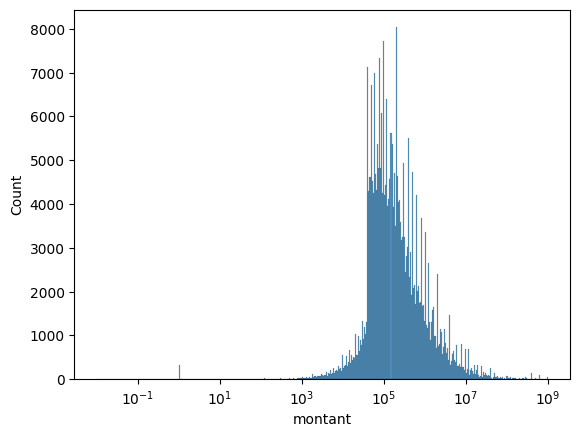

In [70]:
sns.histplot(df['montant'], log_scale=True)

In [26]:
df['sousTraitanceDeclaree'].isna().sum()

144559

In [27]:
df.isna().sum().sort_values(ascending=False)

idAccordCadre                234106
marcheInnovant               176350
attributionAvance            173879
sousTraitanceDeclaree        144559
origineUE                    130481
origineFrance                130480
tauxAvance                   129557
offresRecues                 101443
titulaire_nom                  7573
titulaire_siren                1133
acheteur_nom                    193
acheteur_siren                  170
dureeMois                         7
datePublicationDonnees            2
lieuExecution_code                0
typeGroupementOperateurs          0
ccag                              0
lieuExecution_typeCode            0
uid                               0
dateNotification                  0
formePrix                         0
id                                0
procedure                         0
codeCPV                           0
montant                           0
objet                             0
titulaire_typeIdentifiant         0
titulaire_id                

In [28]:
df['formePrix']

0         Forfaitaire
1         Forfaitaire
2         Forfaitaire
3         Forfaitaire
4            Unitaire
             ...     
299665          Mixte
299666    Forfaitaire
299667       Unitaire
299668          Mixte
299669    Forfaitaire
Name: formePrix, Length: 299670, dtype: object

In [29]:
df['montant'].median()

158355.3

In [30]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [31]:
df.describe()

,montant,dureeMois,attributionAvance,offresRecues,marcheInnovant,sousTraitanceDeclaree,tauxAvance,origineUE,origineFrance
count,299670,299663,125791,198227,123320,155111,170113,169189,169190
mean,10400531089,28,0,5,0,0,0,0,0
std,1017208205225,25,0,37,0,0,0,0,0
min,0,1,0,1,0,0,0,0,0
25%,70000,12,0,2,0,0,0,0,0
50%,158355,24,0,3,0,0,0,0,0
75%,469065,48,0,5,0,1,0,0,0
max,99999999999999,2555,1,13454,1,1,1,1,1


In [32]:
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x).replace(',', ' '))

In [33]:
df.describe()

,montant,dureeMois,attributionAvance,offresRecues,marcheInnovant,sousTraitanceDeclaree,tauxAvance,origineUE,origineFrance
count,299 670,299 663,125 791,198 227,123 320,155 111,170 113,169 189,169 190
mean,10 400 531 089,28,0,5,0,0,0,0,0
std,1 017 208 205 225,25,0,37,0,0,0,0,0
min,0,1,0,1,0,0,0,0,0
25%,70 000,12,0,2,0,0,0,0,0
50%,158 355,24,0,3,0,0,0,0,0
75%,469 065,48,0,5,0,1,0,0,0
max,99 999 999 999 999,2 555,1,13 454,1,1,1,1,1


In [34]:
y = data['montant']
X = data[['procedure', 'dureeMois','nature', 'formePrix', 'offresRecues', 'ccag',
          'sousTraitanceDeclaree', 'typeGroupementOperateurs', 'tauxAvance', 'origineUE',
          'origineFrance']]

In [35]:
X.dureeMois = X.dureeMois.replace(np.nan, 1)

/var/folders/nj/s1c8f0tj3ksfjdg8xyxr6rdc0000gn/T/ipykernel_54587/106127366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dureeMois = X.dureeMois.replace(np.nan, 1)


In [36]:
X.offresRecues = X.offresRecues.replace(np.nan, 1)

/var/folders/nj/s1c8f0tj3ksfjdg8xyxr6rdc0000gn/T/ipykernel_54587/1904493237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.offresRecues = X.offresRecues.replace(np.nan, 1)


In [37]:
X.sousTraitanceDeclaree = X.sousTraitanceDeclaree.replace(np.nan, 0)

/var/folders/nj/s1c8f0tj3ksfjdg8xyxr6rdc0000gn/T/ipykernel_54587/541524272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.sousTraitanceDeclaree = X.sousTraitanceDeclaree.replace(np.nan, 0)


In [38]:
X.tauxAvance = X.tauxAvance.replace(np.nan, 0)

/var/folders/nj/s1c8f0tj3ksfjdg8xyxr6rdc0000gn/T/ipykernel_54587/3872898892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.tauxAvance = X.tauxAvance.replace(np.nan, 0)


In [39]:
X.origineFrance = X.origineFrance.replace(np.nan, 0)
X.origineUE = X.origineUE.replace(np.nan, 0)

/var/folders/nj/s1c8f0tj3ksfjdg8xyxr6rdc0000gn/T/ipykernel_54587/2194578397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.origineFrance = X.origineFrance.replace(np.nan, 0)
/var/folders/nj/s1c8f0tj3ksfjdg8xyxr6rdc0000gn/T/ipykernel_54587/2194578397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.origineUE = X.origineUE.replace(np.nan, 0)


In [40]:
X.isna().sum().sort_values(ascending=False)

procedure                   0
dureeMois                   0
nature                      0
formePrix                   0
offresRecues                0
ccag                        0
sousTraitanceDeclaree       0
typeGroupementOperateurs    0
tauxAvance                  0
origineUE                   0
origineFrance               0
dtype: int64

In [41]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
ohe.fit(X[['procedure', 'formePrix', 'ccag', 'typeGroupementOperateurs', 'nature']])

X[ohe.get_feature_names_out()] = ohe.transform(X[['procedure', 'formePrix', 'ccag', 'typeGroupementOperateurs', 'nature']])

/var/folders/nj/s1c8f0tj3ksfjdg8xyxr6rdc0000gn/T/ipykernel_54587/1474773426.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ohe.get_feature_names_out()] = ohe.transform(X[['procedure', 'formePrix', 'ccag', 'typeGroupementOperateurs', 'nature']])
/var/folders/nj/s1c8f0tj3ksfjdg8xyxr6rdc0000gn/T/ipykernel_54587/1474773426.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ohe.get_feature_names_out()] = ohe.transform(X[['procedure', 'formePrix', 'ccag', 'typeGroupementOperateurs', 'nature']])
/var/fol

In [42]:
X = X.drop(columns=['procedure', 'formePrix', 'ccag', 'typeGroupementOperateurs', 'nature'])
X.sample(3)

,dureeMois,offresRecues,sousTraitanceDeclaree,tauxAvance,origineUE,origineFrance,procedure_Appel d'offres ouvert,procedure_Appel d'offres restreint,procedure_Dialogue compétitif,procedure_Marché passé sans publicité ni mise en concurrence préalable,...,ccag_Pas de CCAG,ccag_Prestations intellectuelles,ccag_Techniques de l'information et de la communication,ccag_Travaux,typeGroupementOperateurs_Conjoint,typeGroupementOperateurs_Pas de groupement,typeGroupementOperateurs_Solidaire,nature_Marché,nature_Marché de défense ou de sécurité,nature_Marché de partenariat
124864,13,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
117920,8,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
80216,48,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
